In [1]:
import geopandas as gpd

%matplotlib inline

In [13]:
fp = '../../data/raw/train/train.shp'

train_shp = gpd.read_file(fp)

train_shp.head()

,Field_Id,Area,Subregion,Crop_Id_Ne,geometry
0,1,0.915905,3,8,POLYGON ((2467881.175041331 -3352032.059296422...
1,2,2.064410,3,6,"POLYGON ((2468428.90623293 -3351993.17305059, ..."
2,3,1.080300,3,8,POLYGON ((2468333.745293362 -3352058.485056543...
3,4,1.316190,3,8,POLYGON ((2468607.857733211 -3352012.337531495...
4,7,5.529220,3,8,"POLYGON ((2468646.08520868 -3351706.201920062,..."


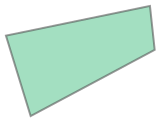

In [37]:
train_shp.geometry.loc[0]

In [32]:
g = train_shp['geometry'].loc[0]
list(g.exterior.coords)

[(2467881.1750413314, -3352032.0592964217),
 (2468026.166997987, -3352002.1613220456),
 (2468030.9295075075, -3352046.3468240052),
 (2467906.045924405, -3352113.021952709),
 (2467881.1750413314, -3352032.0592964217)]

In [34]:
import rasterio
from rasterio.windows import Window
from pyproj import Proj
from math import floor, ceil


def longlat2window(lon, lat, dataset):
    """
    Args:
        lon (tuple): Tuple of min and max lon
        lat (tuple): Tuple of min and max lat
        dataset: Rasterio dataset

    Returns:
        rasterio.windows.Window
    """
    p = Proj(dataset.crs)
    t = dataset.transform
    xmin, ymin = p(lon[0], lat[0])
    xmax, ymax = p(lon[1], lat[1])
    col_min, row_min = ~t * (xmin, ymin)
    col_max, row_max = ~t * (xmax, ymax)
    return Window.from_slices(rows=(floor(row_max), ceil(row_min)),
                              cols=(floor(col_min), ceil(col_max)))

In [33]:
import utm

In [36]:
utm.to_latlon(2467881.1750413314, -3352032.0592964217, 34)

ValueError: either zone_letter or northern needs to be set

In [35]:
with rasterio.open(fp) as src:
    
    window = longlat2window((-99.2, -99.17), (19.40, 19.43), src)
    arr = src.read(1, window=window)

NameError: name 'file' is not defined

In [19]:
from rasterio import mask

def get_density(geom, raster):
    if geom is None:
        return 0.
    try:
        out_image, out_transform=mask.mask(raster, [geom],crop=True)
    except ValueError:
        return 0.
    return out_image[out_image>0].sum()

## Read in Raster

In [15]:
import os
import rasterio
from rasterio.plot import show
from glob import glob

In [16]:
img_dir = '../../data/raw/S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE/GRANULE/L1C_T34JEP_A007983_20170101T084543/IMG_DATA/'

In [54]:
!ls $img_dir

T34JEP_20170101T082332_B01.jp2 T34JEP_20170101T082332_B08.jp2
T34JEP_20170101T082332_B02.jp2 T34JEP_20170101T082332_B09.jp2
T34JEP_20170101T082332_B03.jp2 T34JEP_20170101T082332_B10.jp2
T34JEP_20170101T082332_B04.jp2 T34JEP_20170101T082332_B11.jp2
T34JEP_20170101T082332_B05.jp2 T34JEP_20170101T082332_B12.jp2
T34JEP_20170101T082332_B06.jp2 T34JEP_20170101T082332_B8A.jp2
T34JEP_20170101T082332_B07.jp2 T34JEP_20170101T082332_TCI.jp2


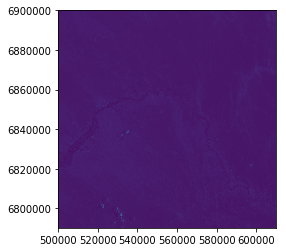

In [20]:
fp = os.path.join(img_dir,'T34JEP_20170101T082332_B02.jp2')

raster = rasterio.open(fp)

show(raster, 1)

TypeError: Invalid dimensions for image data

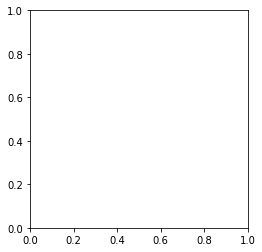

In [21]:
x = get_density(train_shp, raster)
show(x, 1)

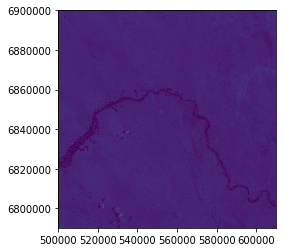

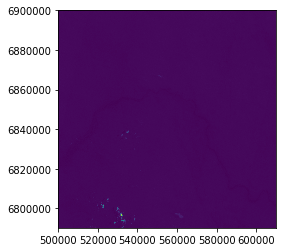

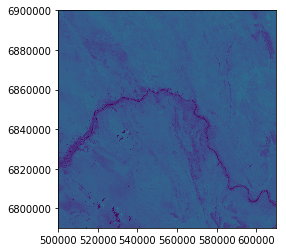

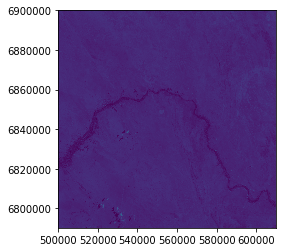

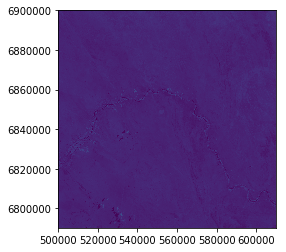

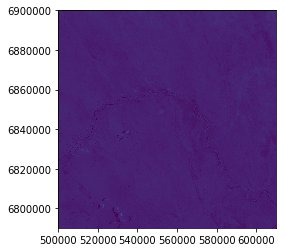

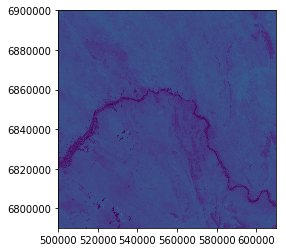

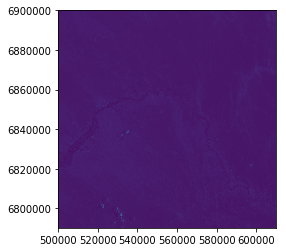

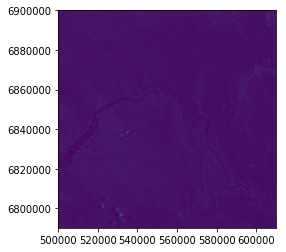

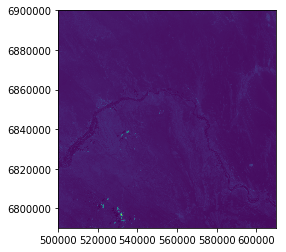

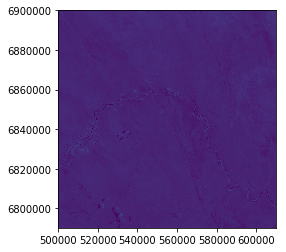

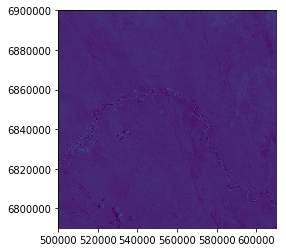

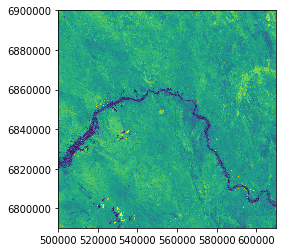

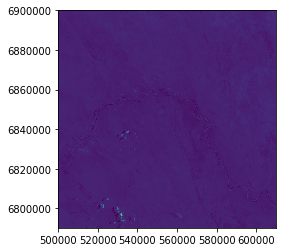

In [38]:
for fp in glob(img_dir+'/*'):
    print(os.path.basename(fp))
    raster = rasterio.open(fp)
    show(raster, 1)